In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set_palette('hls',30)


In [6]:
df = pd.read_csv(r"C:\Users\opandey2\Desktop\automobile.csv")
df.head(5)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


#### Exploring the Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [9]:
print(df['horsepower'].tail())

393    86.0
394    52.0
395    84.0
396    79.0
397    82.0
Name: horsepower, dtype: float64


#### Filling median value in null values



In [19]:
hpower_median = np.ceil(df['horsepower'].median())
avg = ("The Meidan value of horsepower is :", hpower_median) 
avg

('The Meidan value of horsepower is :', 94.0)

In [21]:
df['horsepower'].fillna(hpower_median, inplace = True)
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [26]:
df['name'].nunique()

305

In [27]:
df['name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [28]:
df['name'] = df['name'].apply(lambda x: x.split(' ')[0])

In [29]:
df.name.value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: name, dtype: int64

In [30]:
df.name.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

Replacing Name:

maxda = mazda
toyota = toyouta
vokswagen = volkswagen = vw
mercedes-benz = mercedes
chevrolet = chevroelt = chevy

In [31]:
df.replace({'name':{"maxda":"mazda",
                   "toyouta":"toyota",
                   "vw":"volkswagen",
                   "mercedes-benz":"mercedes",
                   "chevroelt":"chevrolet",
                   "chevy":"chevrolet"}}, inplace = True)

In [32]:
#Dropping the rows which have 'Hi' or 'capri' values in the 'Name' column.

df = df[~df['name'].isin(['hi','capri'])]

In [36]:
origin_count = df.groupby(['name','origin'], as_index=False).size().sort_values(by='size',ascending = False)
origin_count

,name,origin,size
10,ford,usa,51
5,chevrolet,usa,47
19,plymouth,usa,31
0,amc,usa,28
8,dodge,usa,28
24,toyota,japan,26
7,datsun,japan,23
27,volkswagen,europe,21
3,buick,usa,17
20,pontiac,usa,16


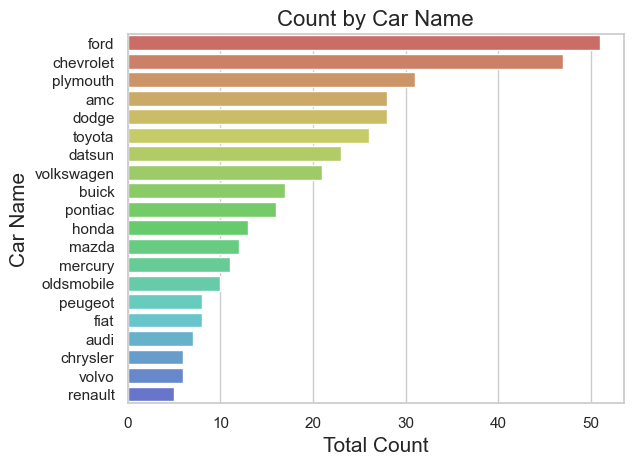

In [39]:
sns.barplot(x=origin_count.iloc[0:20,2], y = origin_count.iloc[0:20,0])
plt.xlabel('Total Count', fontsize = 15)
plt.ylabel('Car Name', fontsize = 15)
plt.title('Count by Car Name', fontsize = 16);

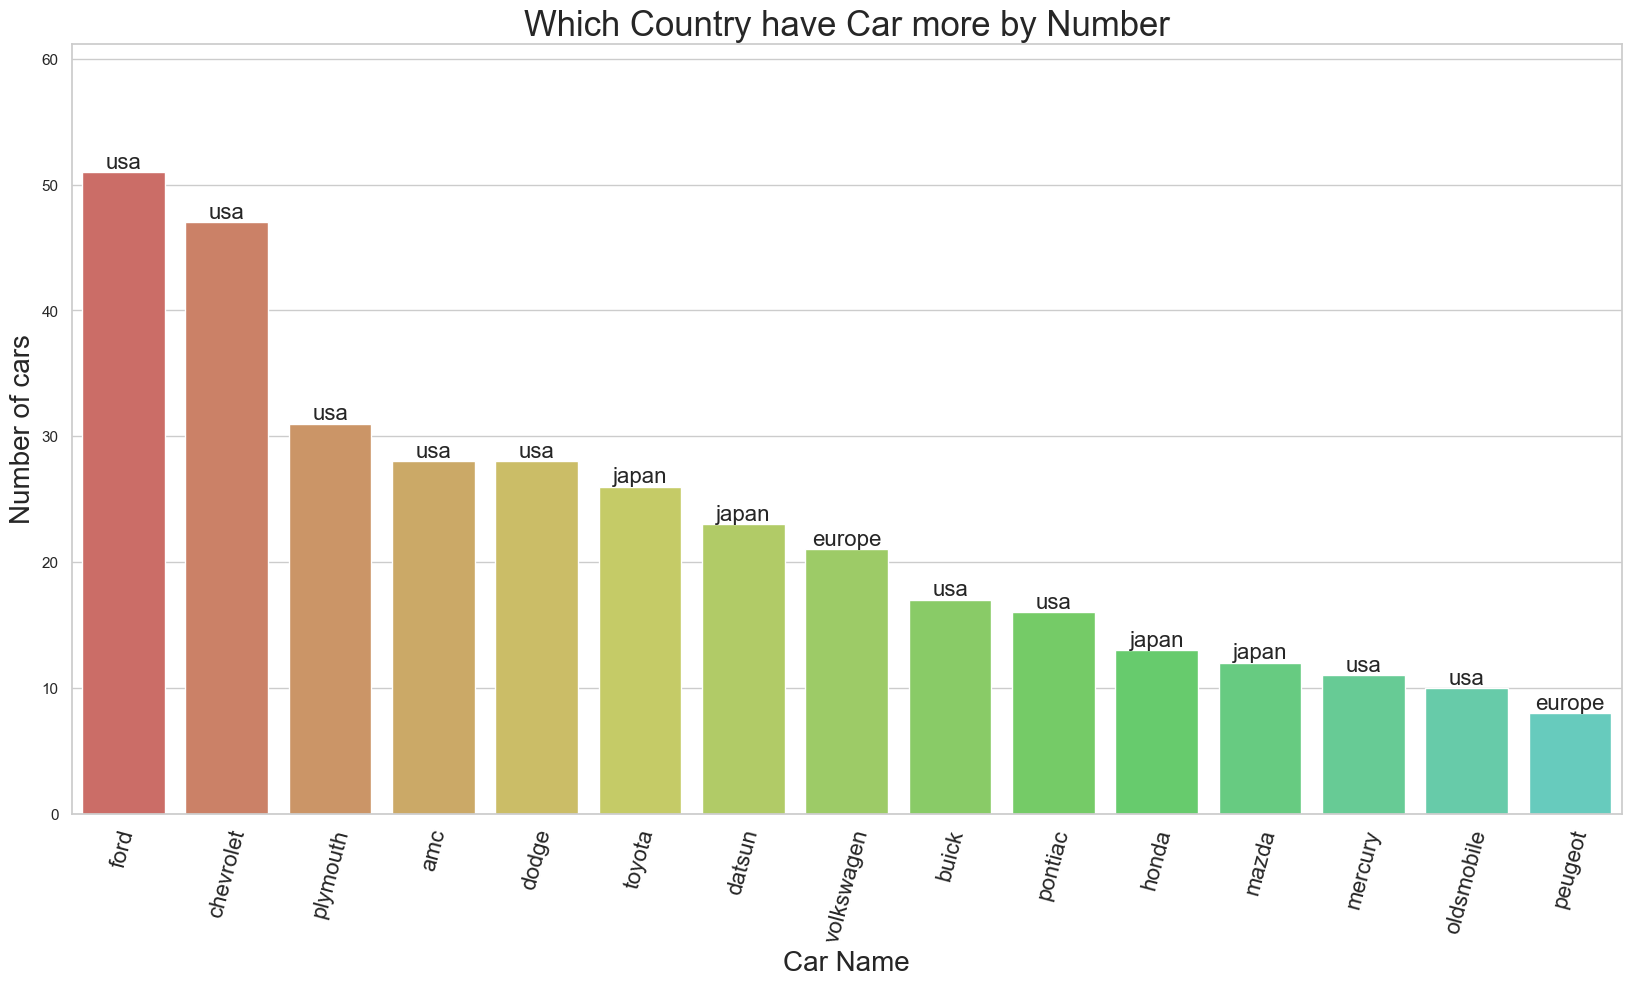

In [47]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x =origin_count.iloc[0:15,0],y = origin_count.iloc[0:15,2])

plt.xlabel('Car Name', fontsize = 20)
plt.ylabel('Number of cars', fontsize=20)
plt.title('Which Country have Car more by Number', fontsize=25)
plt.xticks(rotation=75,fontsize =16)
plt.margins(y=0.2)

#Annoting the bar plot

labels = origin_count['origin'].values

for rect, label in zip(ax.patches, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height,
    label, ha = "center", va = "bottom", fontsize=16)
    
plt.show()

In [61]:
o_count = df.groupby('origin').size().sort_values()

o_count = o_count.rename('Count').reset_index()
o_count

,origin,Count
0,europe,70
1,japan,79
2,usa,247


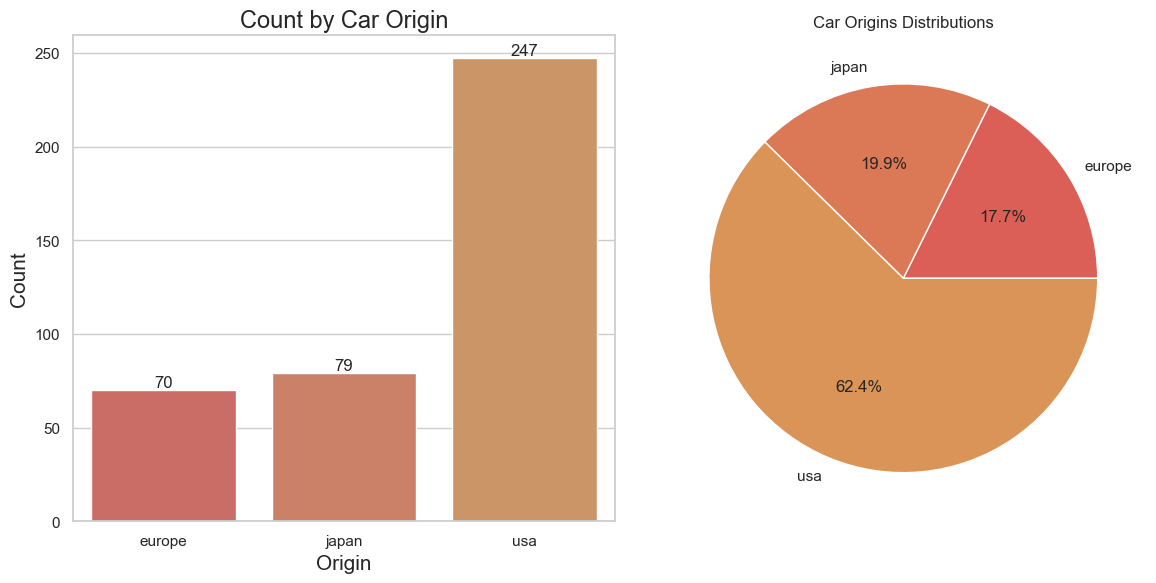

In [66]:
#Creating subplots:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(12,6))

#ploting the count bar plot

sns.barplot(x='origin', y='Count', data = o_count, ax = ax1)
ax1.set_xlabel('Origin', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Count by Car Origin', fontsize=17)
ax1.bar_label(ax1.containers[0])


#ploting the Pie Chat:

ax2.pie(o_count['Count'], labels = o_count['origin'], autopct='%1.1f%%')
ax2.set_title('Car Origins Distributions')


#Ro adjust the spacing between plots
plt.tight_layout()


#To display
plt.show()

In [75]:
def two_plots_num_col(feature):
    
    plt.subplot(1,2,1)
    plt.title("Histogram", fontsize=18)
    sns.histplot(data = df, x=feature, kde=True)
    
    plt.subplot(1,2,2)
    plt.title('Boxplot', fontsize=18)
    sns.boxplot(y = df[feature])

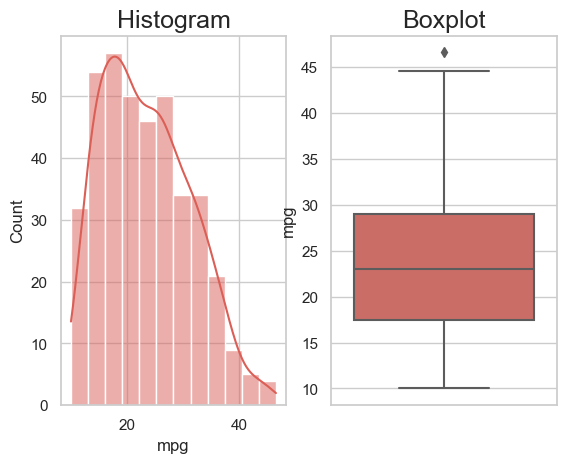

In [79]:
two_plots_num_col('mpg')

##### Most of the cars travel a distance of range 20-25 miles using gallon of fuel.

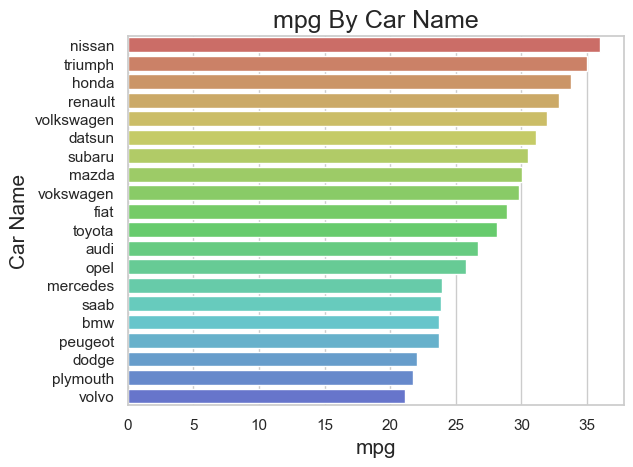

In [88]:
def grouping_features(feature):
    
    #grouping 
    by_feature = df.groupby('name', as_index = False) [feature].mean().sort_values(by = feature, ascending = False)
    
    #plotting
    sns.barplot(x=by_feature.iloc[0:20, 1], y = by_feature.iloc[0:20, 0])
    
    plt.xlabel(f"{feature}", fontsize =15)
    plt.ylabel('Car Name', fontsize = 15)
    plt.title(f'{feature} By Car Name', fontsize = 18);

    
grouping_features('mpg')

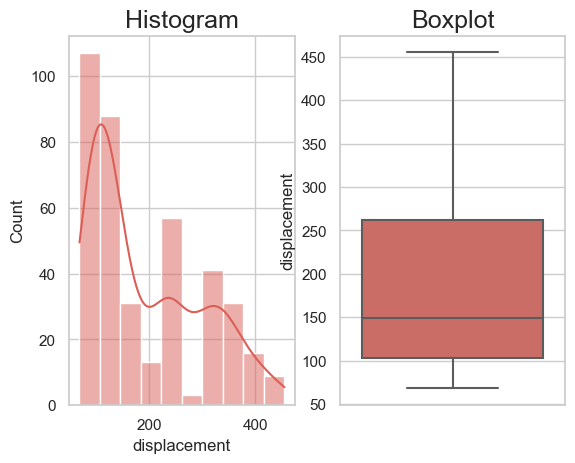

In [91]:
#displacement feature

two_plots_num_col('displacement')

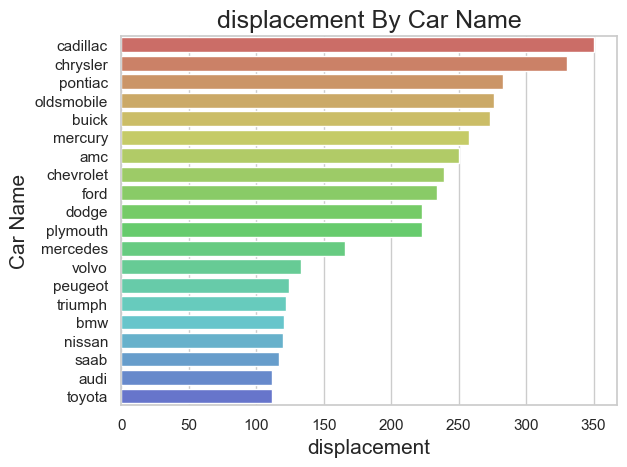

In [92]:
grouping_features('displacement')

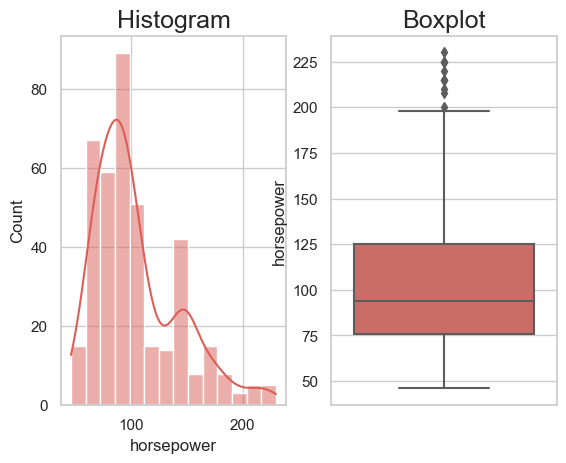

In [95]:
#Horsepower Feature

two_plots_num_col('horsepower')

#Most cars have mediam horse power that power output of the engine of most cars equals 100.


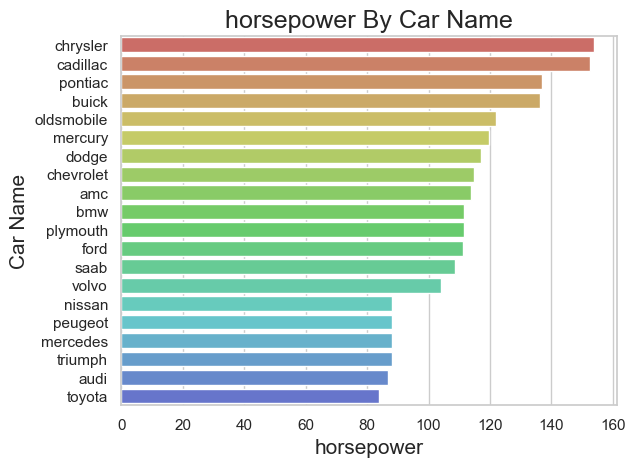

In [98]:
grouping_features('horsepower')

#chrysler and cadillac cars have the highes average of horse power equals 150.

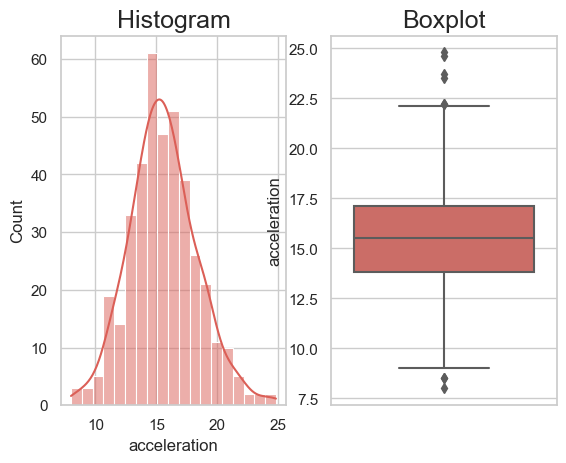

In [101]:
## Acceleration feature

two_plots_num_col('acceleration')

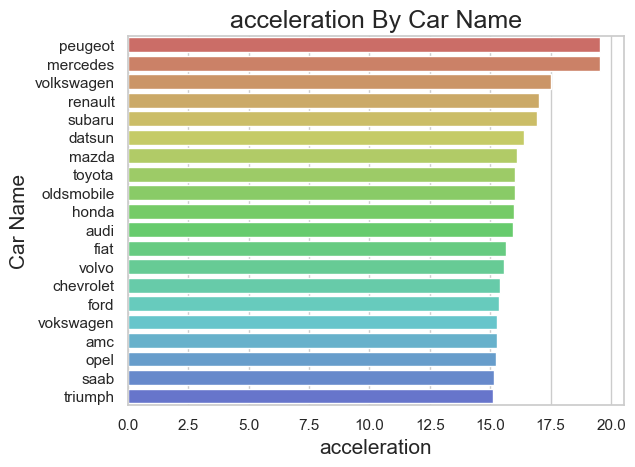

In [103]:
grouping_features('acceleration')


### The two fastest car are peugeot and mercedes

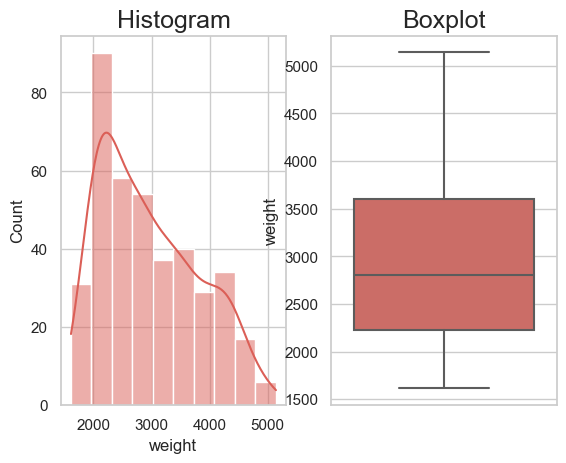

In [107]:
### Weight feature of the cars


two_plots_num_col('weight')

##The weight of the most car is 2000kgs

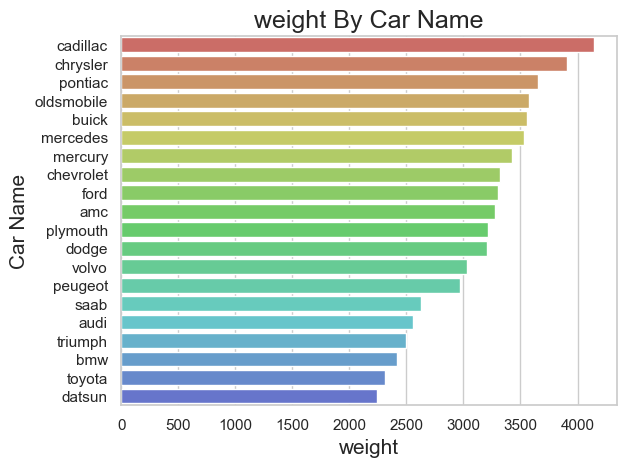

In [108]:
grouping_features('weight')

##Chrysler and cadillac cars have the highest average of weight

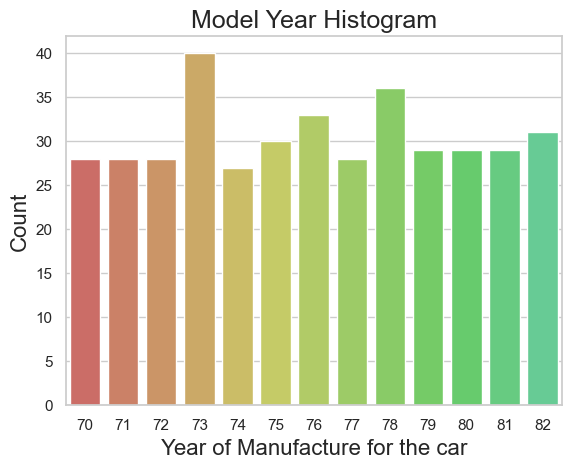

In [110]:
## Model Year Feature

plot = sns.countplot(data=df, x='model_year')
plt.title('Model Year Histogram', fontsize = 18)
plt.xlabel('Year of Manufacture for the car', fontsize=16)
plt.ylabel('Count', fontsize=16);

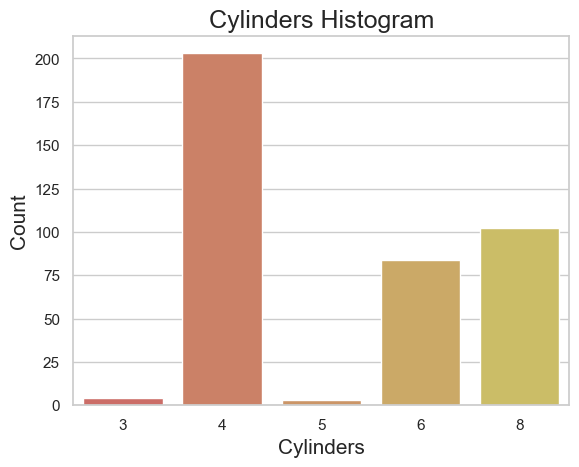

In [112]:
#Cylinders Feature of the car

plot = sns.countplot(data=df, x='cylinders')
plt.title('Cylinders Histogram', fontsize =18)
plt.xlabel('Cylinders', fontsize = 15)
plt.ylabel('Count', fontsize= 15);


##most cars have four culinders and almost no cars have three or five cylinders.